# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Frans Gabriel Sianturi
- Email: franssianturi99@gmail.com
- Id Dicoding: frans_sianturi

## 1. Persiapan

### 1.1 Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### 1.2 Load dataset yang digunakan

In [2]:
dataset = pd.read_csv("data.csv", delimiter=";")
pd.set_option('display.max_columns', None)
dataset.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


### 1.3 Persiapan data

#### 1.3.1 Ringkasan dataset

In [3]:
dataset.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

Deskripsi Dataset:

- Marital status: Status pernikahan mahasiswa. (Categorical)
- Application mode: Metode aplikasi yang digunakan oleh mahasiswa. (Categorical)
- Application order: Urutan pendaftaran yang dilakukan mahasiswa (Numerical)
- Course: Mata kuliah yang diambil oleh mahasiswa. (Categorical)
- Daytime/evening attendance: Apakah mahasiswa menghadiri kelas pada siang hari atau malam hari. (Categorical)
- Previous qualification: Kualifikasi yang diperoleh mahasiswa sebelum mendaftar di pendidikan tinggi. (Categorical)
- Nationality: Kewarganegaraan mahasiswa. (Categorical)
- Mother's qualification: Kualifikasi ibu mahasiswa. (Categorical)
- Father's qualification: Kualifikasi ayah mahasiswa. (Categorical)
- Mother's occupation: Pekerjaan ibu mahasiswa. (Categorical)
- Father's occupation: Pekerjaan ayah mahasiswa. (Categorical)
- Displaced: Apakah mahasiswa tersebut adalah orang yang terlantar. (Categorical)
- Educational special needs: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Categorical)
- Debtor: Apakah mahasiswa tersebut seorang debitur. (Categorical)
- Tuition fees up to date: Apakah biaya pendidikan mahasiswa sudah sesuai dengan yang terbaru. (Categorical)
- Gender: Jenis kelamin mahasiswa. (Categorical)
- Scholarship holder: Apakah mahasiswa tersebut adalah pemegang beamahasiswa. (Categorical)
- Age at enrollment: Usia mahasiswa pada saat pendaftaran. (Numerical)
- International: Apakah mahasiswa tersebut adalah mahasiswa internasional. (Categorical)
- Curricular units 1st sem (credited): Jumlah unit kurikuler yang dikreditkan oleh mahamahasiswa pada semester pertama. (Numerical)
- Curricular units 1st sem (enrolled): Jumlah unit kurikuler yang diambil oleh mahamahasiswa pada semester pertama. (Numerical)
- Curricular units 1st sem (evaluations): Jumlah unit kurikuler yang dievaluasi oleh mahasiswa pada semester pertama. (Numerical)
- Curricular units 1st sem (approved): Jumlah unit kurikuler yang disetujui oleh mahamahasiswa pada semester pertama. (Numerical)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset terdiri atas:
- columns sebanyak 35
- rows sebanyak 4424
- tipe data float64 (5), int64 (29), dan object (1)

In [5]:
# Lihat fitur tipe object
for feature in dataset.select_dtypes(include='object'):
    print(feature)
    print(dataset[feature].unique(), '\n')

Status
['Dropout' 'Graduate' 'Enrolled'] 



In [6]:
dataset.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
# Describe khusus fitur tipe object
dataset.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


#### 1.3.2 Data kosong dan duplikat

In [8]:
# Cek data kosong
dataset.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak terdapat data kosong dari dataset

In [9]:
# Cek data duplikat
dataset.duplicated().sum()

0

#### 1.3.3 Data unique

In [10]:
print(dataset.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

Terdapat masing-masing data unique dalam dataset dengan fitur admission_grade memiliki data unique terbanyak

#### Label Decoding

Label decoding yaitu pengembalian nilai awal dari fitur. Fitur tersebut terdiri atas:
- Marital status: skala 0-6
- Daytime_evening_attendance: Evening atau Daytime
- Gender: Female atau Male
- Displaced, Educational_special_needs, Debtor, Tuition_fees_up_to_date, Scholarship_holder, dan international: Yes atau No
- **Application_mode:**
1  - 1st Phase - General Contingent  
2  - Ordinance No. 612/93  
3  - 1st Phase - Special Contingent (Azores Island)  
4  - Holders of Other Higher Courses  
5  - Ordinance No. 854-B/99  
6  - International Student (Bachelor)  
7  - 1st Phase - Special Contingent (Madeira Island)  
8  - 2nd Phase - General Contingent  
9  - 3rd Phase - General Contingent  
10 - Ordinance No. 533-A/99, Item B2 (Different Plan)  
11 - Ordinance No. 533-A/99, Item B3 (Other Institution)  
12 - Over 23 Years Old  
13 - Transfer  
14 - Change of Course  
15 - Technological Specialization Diploma Holders  
16 - Change of Institution/Course  
17 - Short Cycle Diploma Holders  
18 - Change of Institution/Course (International)  

- **Previous_qualification:** 
1  - Secondary Education  
2  - Higher Education - Bachelor's Degree  
3  - Higher Education - Degree  
4  - Higher Education - Master's  
5  - Higher Education - Doctorate  
6  - Frequency of Higher Education  
9  - 12th Year of Schooling - Not Completed  
10 - 11th Year of Schooling - Not Completed  
12 - Other - 11th Year of Schooling  
14 - 10th Year of Schooling  
15 - 10th Year of Schooling - Not Completed  
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.  
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.  
39 - Technological Specialization Course  
40 - Higher Education - Degree (1st Cycle)  
42 - Professional Higher Technical Course  
43 - Higher Education - Master (2nd Cycle)  

- **Nacionality:** 
1  - Portuguese  
2  - German  
6  - Spanish  
11 - Italian  
13 - Dutch  
14 - English  
17 - Lithuanian  
21 - Angolan  
22 - Cape Verdean  
24 - Guinean  
25 - Mozambican  
26 - Santomean  
32 - Turkish  
41 - Brazilian  
62 - Romanian  
100 - Moldova (Republic of)  
101 - Mexican  
103 - Ukrainian  
105 - Russian  
108 - Cuban  
109 - Colombian  

- **Mothers_qualification & Fathers_qualification:**
1  - Secondary Education - 12th Year of Schooling or Eq.  
2  - Higher Education - Bachelor's Degree  
3  - Higher Education - Degree  
4  - Higher Education - Master's  
5  - Higher Education - Doctorate  
6  - Frequency of Higher Education  
9  - 12th Year of Schooling - Not Completed  
10 - 11th Year of Schooling - Not Completed  
11 - 7th Year (Old)  
12 - Other - 11th Year of Schooling  
13 - 2nd Year Complementary High School Course  
14 - 10th Year of Schooling  
18 - General Commerce Course  
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.  
20 - Complementary High School Course  
22 - Technical - Professional Course  
25 - Complementary High School Course - Not Concluded  
26 - 7th Year of Schooling  
27 - 2nd Cycle of the General High School Course  
29 - 9th Year of Schooling - Not Completed  
30 - 8th Year of Schooling  
31 - General Course of Administration and Commerce  
33 - Supplementary Accounting and Administration  
34 - Unknown  
35 - Can't Read or Write  
36 - Can Read Without Having a 4th Year of Schooling  
37 - Basic Education 1st Cycle (4th/5th Year) or Equiv.  
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.  
39 - Technological Specialization Course  
40 - Higher Education - Degree (1st Cycle)  
41 - Specialized Higher Studies Course  
42 - Professional Higher Technical Course  
43 - Higher Education - Master (2nd Cycle)  
44 - Higher Education - Doctorate (3rd Cycle)

- **Mothers_occupation & Fathers_occupation:** 0 - Student
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers  
2 - Specialists in Intellectual and Scientific Activities  
3 - Intermediate Level Technicians and Professions  
4 - Administrative Staff  
5 - Personal Services, Security and Safety Workers and Sellers  
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry  
7 - Skilled Workers in Industry, Construction and Craftsmen  
8 - Installation and Machine Operators and Assembly Workers  
9 - Unskilled Workers  
10 - Armed Forces Professions  
90 - Other Situation  
99 - (Blank)  
101 - Armed Forces Officers  
102 - Armed Forces Sergeants  
103 - Other Armed Forces Personnel  
112 - Directors of Administrative and Commercial Services  
114 - Hotel, Catering, Trade and Other Services Directors  
121 - Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques  
122 - Health Professionals  
123 - Teachers  
124 - Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations  
125 - Specialists in Information and Communication Technologies (ICT)  
131 - Intermediate Level Science and Engineering Technicians and Professions  
132 - Technicians and Professionals, of Intermediate Level of Health  
134 - Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services  
135 - Information and Communication Technology Technicians  
141 - Office Workers, Secretaries in General and Data Processing Operators  
143 - Data, Accounting, Statistical, Financial Services and Registry-Related Operators  
144 - Other Administrative Support Staff  
151 - Personal Service Workers  
152 - Sellers  
153 - Personal Care Workers and the Like  
154 - Protection and Security Services Personnel  
161 - Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers  
163 - Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence  
171 - Skilled Construction Workers and the Like, Except Electricians  
172 - Skilled Workers in Metallurgy, Metalworking and Similar  
173 - Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like  
174 - Skilled Workers in Electricity and Electronics  
175 - Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts  
181 - Fixed Plant and Machine Operators  
182 - Assembly Workers  
183 - Vehicle Drivers and Mobile Equipment Operators  
191 - Cleaning Workers  
192 - Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry  
193 - Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport  
194 - Meal Preparation Assistants  
195 - Street Vendors (Except Food) and Street Service Providers  

In [11]:
# Fungsi label decoding
def label_decoding(dataset, feature):
    """
    Transform encoded feature in a DataFrame to their respective categorical labels

    Parameters
        dataset (pandas.DataFrame) : The DataFrame containing the feature to be transformed
        feature (str or list of str) : The name of the feature to be transformed

    Returns
        pandas.DataFrame : The DataFrame with the specified feature as categorical labels
    """

    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            dataset[f] = dataset[f].map(category_mappings[f])
        elif f in binary_features:
            dataset[f] = dataset[f].map(binary_mapping)

    return dataset

In [12]:
dataset_eda = dataset.copy()

dataset_eda = label_decoding(dataset_eda, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

dataset_eda

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,Yes,No,No,Yes,Male,No,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,Yes,No,No,No,Male,No,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,Unskilled Workers,Unskilled Workers,124.8,Yes,No,No,No,Male,No,19,No,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,Yes,No,No,Yes,Female,No,20,No,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,No,No,No,Yes,Female,No,45,No,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,"Personal Services, Security and Safety Workers...",Administrative Staff,122.2,No,No,No,Yes,Male,No,19,No,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,Unskilled Workers,119.0,Yes,No,Yes,No,Female,No,18,Yes,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq.

In [13]:
for feature in dataset_eda.select_dtypes(include='object'):
    print(feature)
    print(dataset_eda[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

#### 1.3.4 Label Encoding
Label encoding dilakukan untuk fitur Status.

In [15]:
le = LabelEncoder()
dataset['Status'] = le.fit_transform(dataset['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

#### 1.3.5 Data Cleaned Export
Export data yang telah di decoding dan encoding untuk pembuatan business dashboard.

In [16]:
# Dataset untuk business dashboard
dataset_eda.to_csv('data_cleaned.csv', index=False)

## 2. Data Understanding

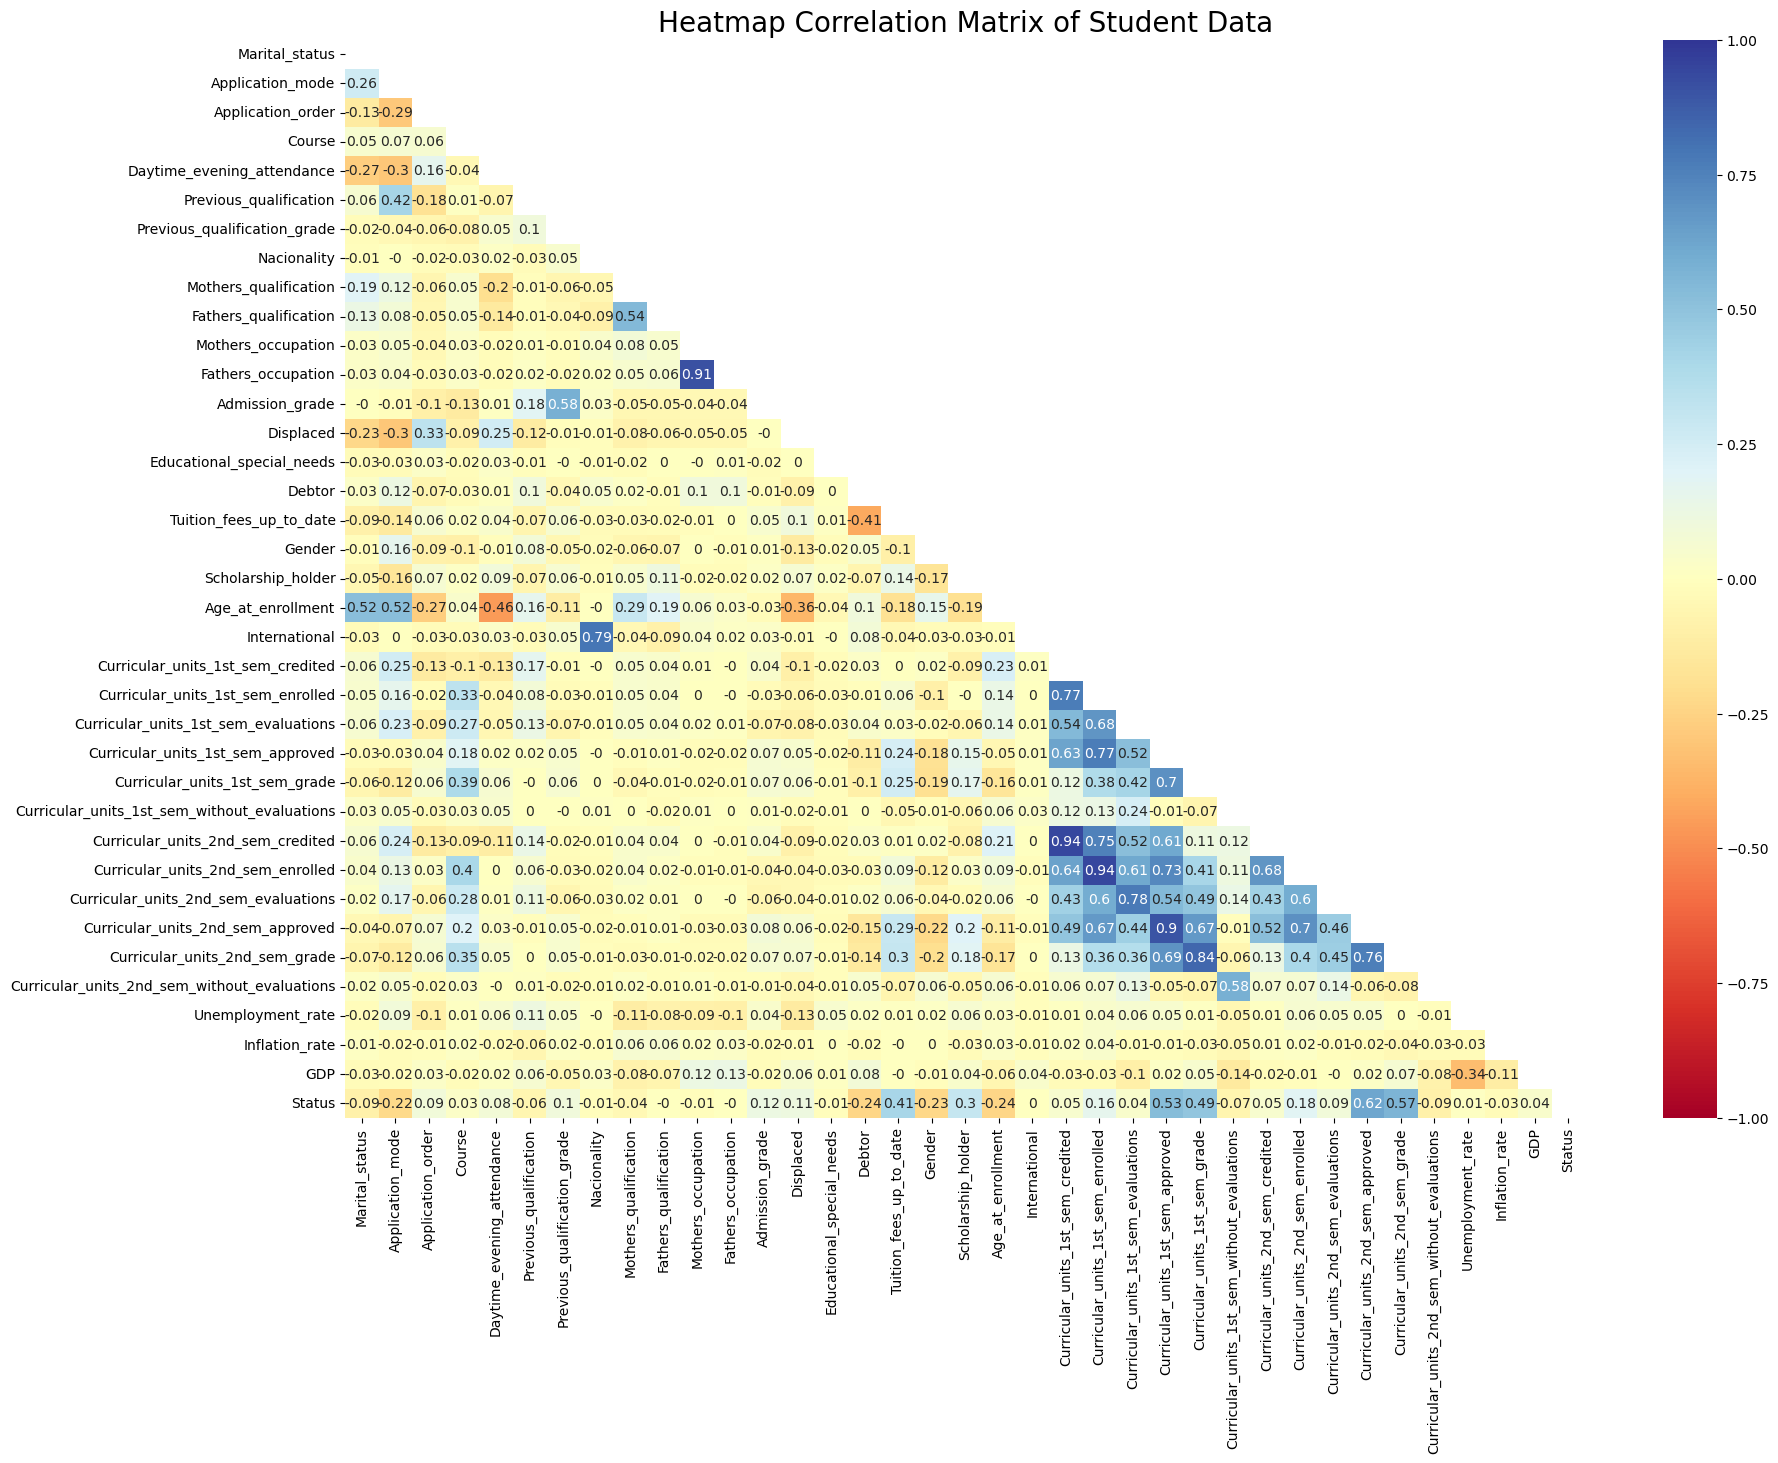

In [21]:
plt.figure(figsize=(20, 14))
correlation_matrix = dataset.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='RdYlBu', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Data', size=20)
plt.show()

Berdasarkan plot matriks korelasi di atas, beberapa poin yang berhubungan dengan Status adalah:
1. Fitur yang memiliki pengaruh yang cukup kuat terhadap Status adalah Curricular_units_2nd_sem_approved dan Curricular_units_2nd_sem_grade.
2. Fitur yang memiliki pengaruh cukup kuat terhadap Status adalah Curricular_units_1nd_sem_approved, Curricular_units_1nd_sem_grade, Tuition_fees_up_to_date, dan Scholarship_holder.
3. Fitur yang memiliki pengaruh rendah terhadap Status adalah Age_at_enrollment, Debitur, Gender, dan Applicatoin_mode.
4. Sisanya adalah fitur yang memiliki pengaruh yang sangat lemah terhadap Status.

In [23]:
# Definisi fungsi pie plot
def pie_plot(data, title):
    """
    Create a pie chart for the distribution of a categorical column.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - title: str, the title of the plot.

    Returns:
    This function does not return any value but displays a pie chart.
    """
    data = data.value_counts()
    plt.pie(data, labels=data.index,
            autopct=lambda pct: f'{int(pct/100.*data.sum())} ({pct:.2f}%)')
    plt.title(f'Distribution of {title}')
    plt.show()
    
# Definisi fungsi hitung plot
def count_plot(data, y, hue=None, title='Data', figsize=(8, 4)):
    """
    Create a countplot with annotations for a given dataset.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - y: str, the column to plot on the y-axis.
    - hue: str, optional, the column for hue categorization.
    - title: str, the title of the plot.
    - figsize: tuple, the size of the figure.

    Returns:
    - This function does not return any value but displays a countplot.
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, y=y, hue=hue,
                    order=data[y].value_counts().index)
    plt.title(f'Distribution of {title}')
    plt.grid()

    if hue:
        plt.legend(loc='lower right')

    # Add annotation label to each bar
    for bar in ax.patches:
        if bar.get_width() > 0 and bar.get_height() > 0:
            ax.annotate(
                f'{int(bar.get_width())}',
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', textcoords='offset points', xytext=(5, 0))

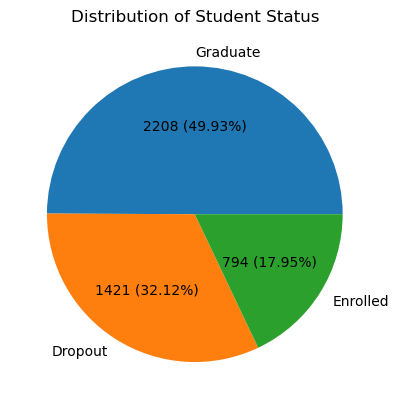

In [24]:
# Panggil fungsi pie plot
pie_plot(dataset_eda['Status'], 'Student Status')

Mahasiswa dengan status Graduate memiliki persentase tertinggi, yaitu 49,93%, diikuti oleh mahasiswa dengan status Dropout, 32,12%, dan status Enrolled yang memiliki persentase terendah, hanya 17,95%.

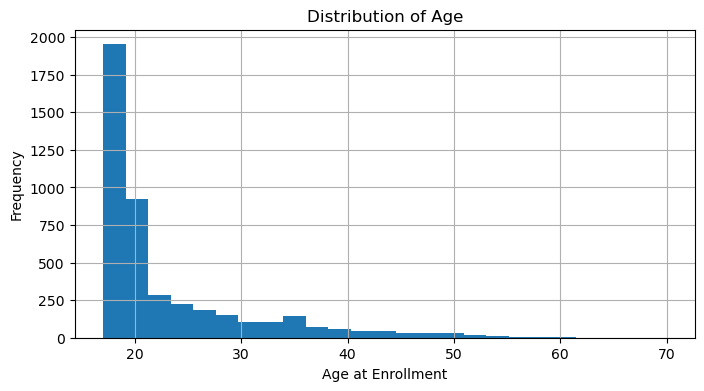

In [ ]:
# Hitung distribusi mahasiswa berdasarkan usia saat mendaftar
plt.figure(figsize=(8, 4))
plt.hist(dataset_eda['Age_at_enrollment'], bins=25)
plt.title('Distribution of Age')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Mayoritas siswa yang mendaftar berusia 17 - 20 tahun.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


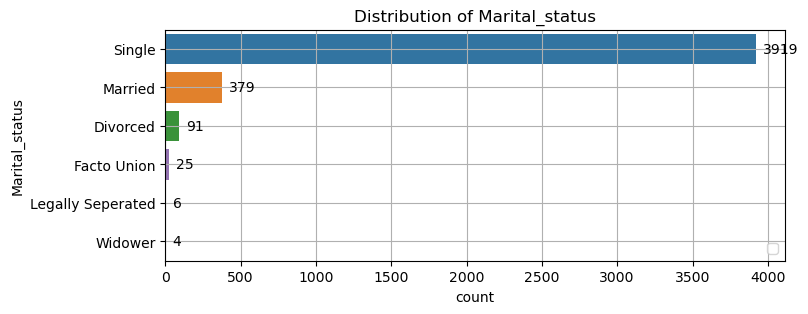

In [ ]:
# Hitung status pernikahan mahasiswa
count_plot(dataset_eda, 'Marital_status', 'Marital_status', 'Marital_status', (8, 3))

Sebagian besar mahasiswa memiliki Status belum menikah.

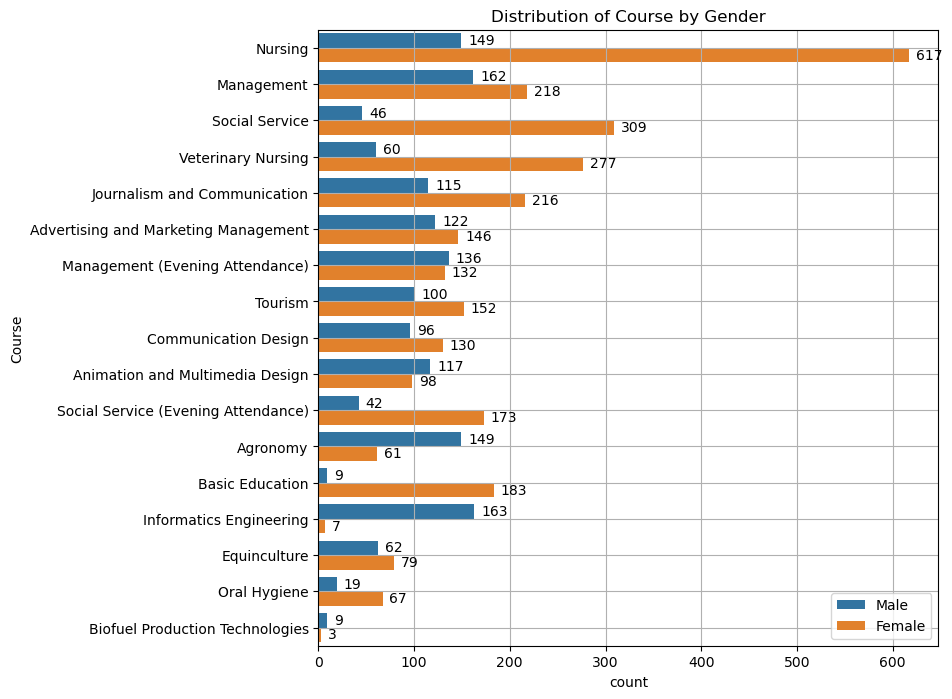

In [ ]:
# Hitung distribusi mahasiswa berdasarkan program studi dan gender
count_plot(dataset_eda, 'Course', 'Gender', 'Course by Gender', (8, 8))

Prodi dengan data terbanyak adalah Keperawatan dengan jenis kelamin dominan Perempuan daripada Laki-laki. Sedangkan Program Studi dengan data paling sedikit adalah Buofuel Productoin Technologies dengan dominasi Laki-laki. Selain itu, mahasiswa laki-laki terbanyak terdapat pada Program Studi Teknik Informatika dan Manajemen.

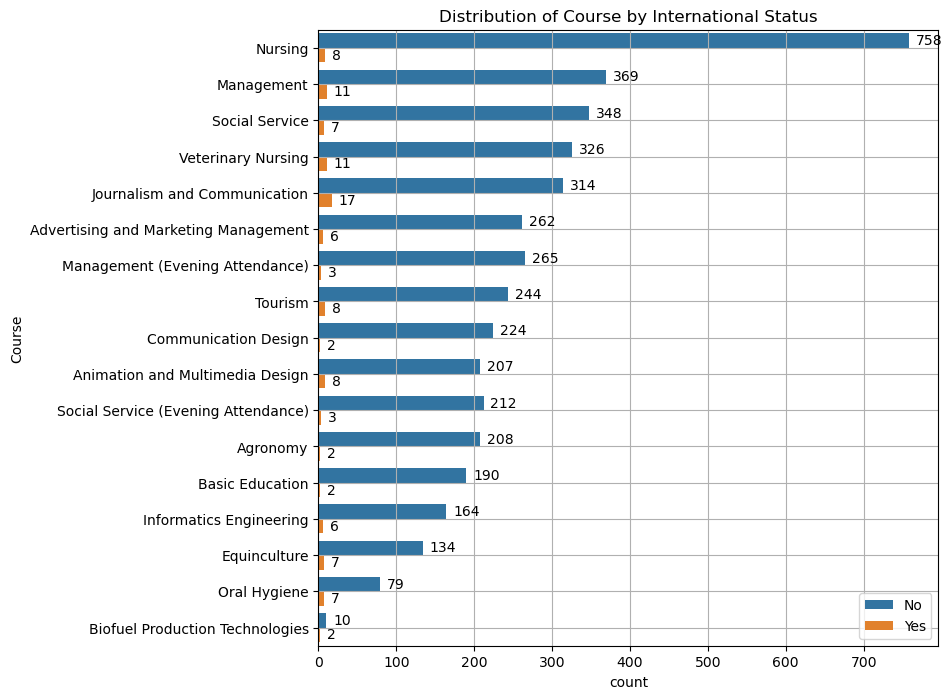

In [ ]:
# Hitung distribusi mahasiswa berdasarkan prodi dilihat dari internasional status
count_plot(dataset_eda, 'Course', 'International', 'Course by International Status', (8, 8))

Secara keseluruhan, jumlah mahasiswa lokal lebih banyak daripada mahasiswa internasional. Mahasiswa internasional lebih banyak mengambil program studi Jurnalisme dan Komunikasi.

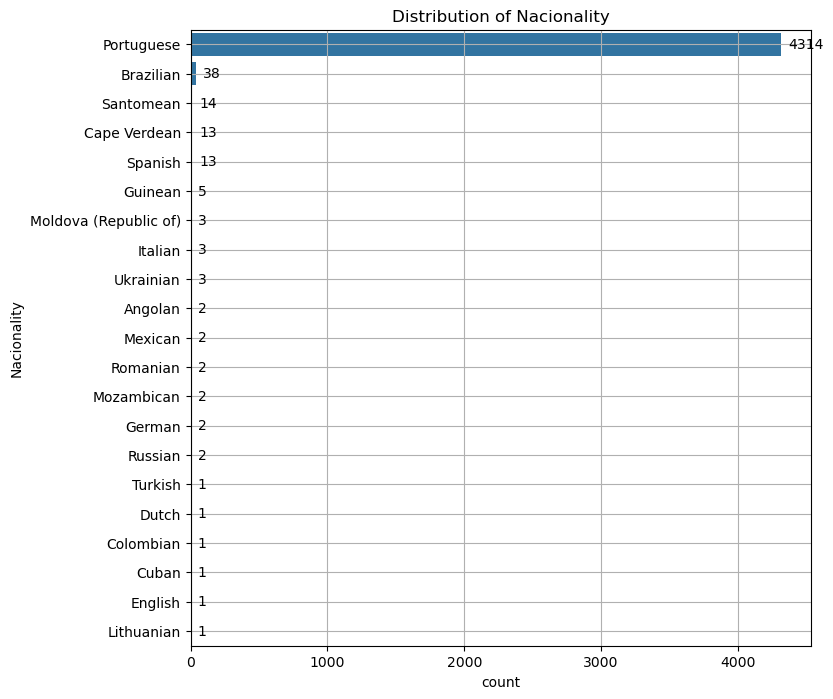

In [ ]:
# Hitung distribusi mahasiswa berdasarkan kewarganegaraannya
count_plot(dataset_eda, 'Nacionality', title='Nacionality', figsize=(8, 8))

Data kewarganegaraan mahasiswa terbanyak berasal dari Portugis, yaitu 97.51% dibandingkan dengan yang lainnya.

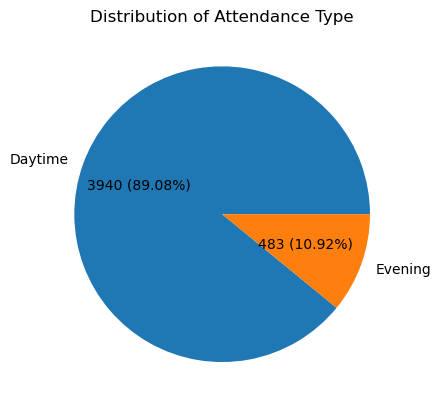

In [30]:
# Hitung distribusi mahasiswa berdasarkan kehadiran waktu kuliah
pie_plot(dataset_eda['Daytime_evening_attendance'], 'Attendance Type')

Mahasiswa dengan kehadiran di siang hari memiliki persentase tertinggi, yaitu 89,08%, sedangkan mahasiswa dengan kehadiran di malam hari hanya 10,92%.

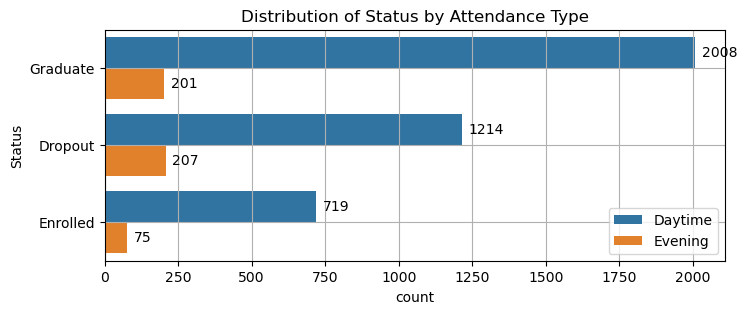

In [31]:
# Hitung distribusi status mahasiswa berdasarkan kehadiran waktu kuliah
count_plot(dataset_eda, 'Status', 'Daytime_evening_attendance', 'Status by Attendance Type', (8, 3))

Sebagian besar mahasiswa memilih untuk belajar di kelas siang hari daripada di kelas malam hari untuk ketiga status, baik itu Graduate, Dropout, atau Enrolled.

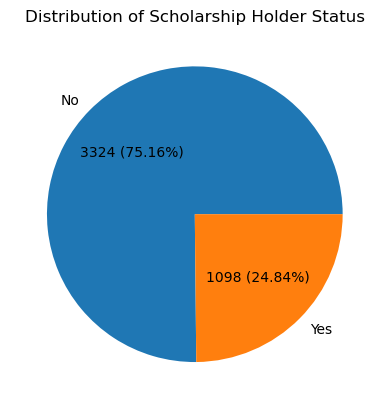

In [32]:
# Hitung distribusi mahasiswa yang mendapatkan status beasiswa
pie_plot(dataset_eda['Scholarship_holder'], 'Scholarship Holder Status')

Mahasiswa dengan pemegang beasiswa hanya 24,84%, hampir 1/4 dari total populasi. Sedangkan yang tidak mendapatkan beasiswa sebanyak 75,16%.

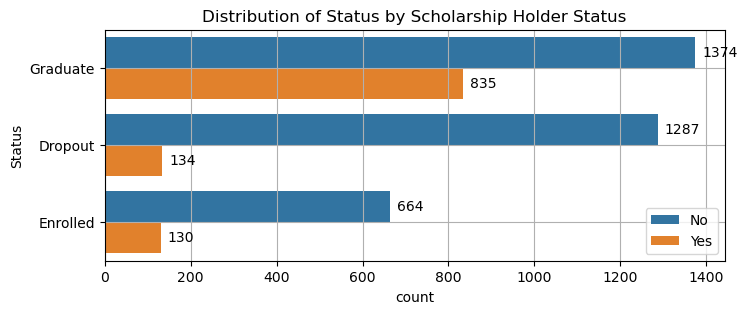

In [33]:
# Hitung distribusi status mahasiswa berdsarkan pemegang beasiswa
count_plot(dataset_eda, 'Status', 'Scholarship_holder', 'Status by Scholarship Holder Status', (8, 3))

Mahasiswa yang menerima beasiswa dan berstatus lulus lebih banyak dibandingkan dengan mahasiswa yang dropout. Jumlah mahasiswa yang menerima beasiswa dengan status dropout dan yang sedang terdaftar hampir sama dan tidak jauh berbeda jumlahnya.

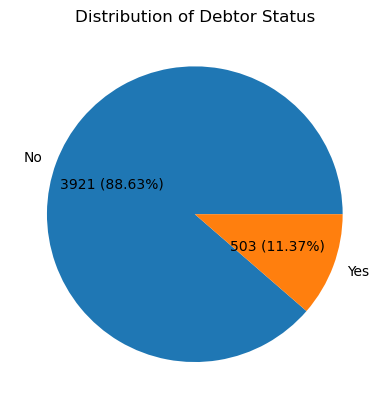

In [34]:
# Hitung distribusi mahasiswa berdsarkan status debitur
pie_plot(dataset_eda['Debtor'], 'Debtor Status')

Hanya 11,37% mahasiswa yang memiliki utang, sementara 88,63% tidak.

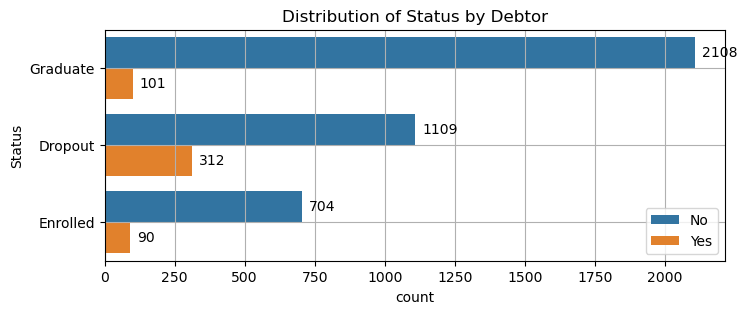

In [35]:
# Hitung distribusi status mahasiswa berdasarkan debitur
count_plot(dataset_eda, 'Status', 'Debtor', 'Status by Debtor', (8, 3))

Mahasiswa yang menjadi debitur tergambar jelas paling banyak adalah mereka yang berstatus dropout dibandingkan dengan mereka yang sudah lulus atau sedang kuliah. Hal ini menggambarkan adanya faktor finansial yang sangat kuat terhadap tingkat kelulusan dan dropout mahasiswa.

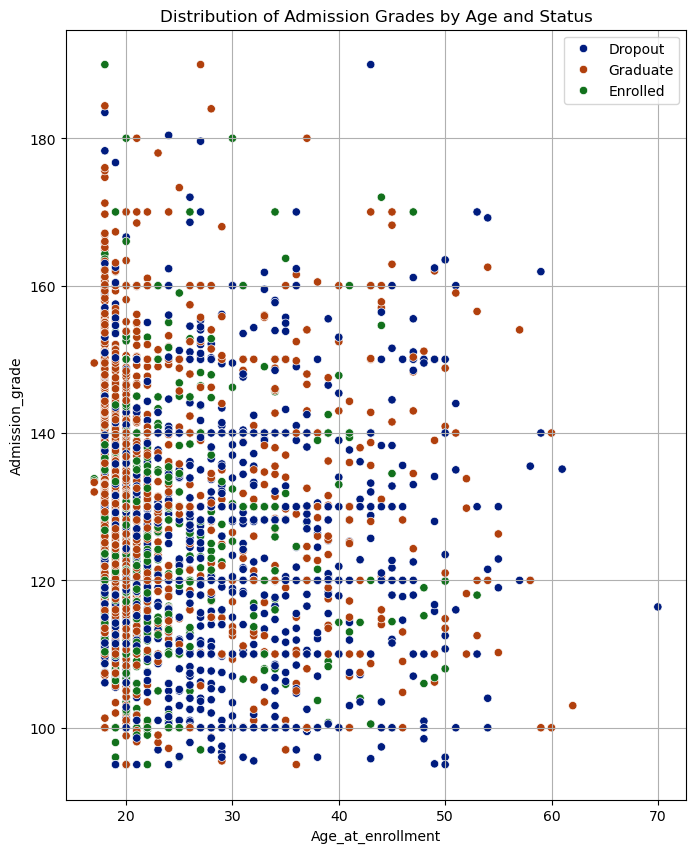

In [42]:
# Visualisasi distribusi nilai mahasiswa berdsarkan usia dan status
plt.figure(figsize=(8, 10))
sns.scatterplot(data=dataset_eda, x='Age_at_enrollment', y='Admission_grade',
                hue='Status', palette='dark')
plt.title('Distribution of Admission Grades by Age and Status')
plt.legend(loc='upper right')
plt.grid()

Berdasarkan scatterplot distribusi Nilai Penerimaan berdasarkan Usia dan Status, dapat disimpulkan bahwa rata-rata mahasiswa yang lulus adalah mereka yang berusia di bawah 20 hingga 25 tahun dengan rata-rata Nilai Penerimaan sekitar 120 hingga 160. Sementara itu, mahasiswa yang berusia 30 hingga 40 tahun atau bahkan 50 tahun memiliki rata-rata Nilai Ujian Masuk sebesar 100 hingga 140 dan berstatus Dropout.

## 3. Data Preparation / Preprocessing

In [43]:
dataset.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [44]:
# Cek nilai label
dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

Hilangkan baris dengan nilai Status sama dengan 1 (Enrolled) dan ubah Gradutae dari 2 menjadi 1.

In [45]:
dataset = dataset[dataset['Status'] != 1]
dataset = dataset.reset_index(drop=True)

dataset.loc[:, 'Status'] = dataset['Status'].replace({2: 1})
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [46]:
dataset['Status'].value_counts()

1    2209
0    1421
Name: Status, dtype: int64

Pada dataset ini, fitur label yang digunakan adalah Status, apakah mahasiswa tersebut Graduate atau Dropout.

#### 3.1 Feature Selection
Filter semua fitur data yang memiliki nilai korelasi absolut kurang dari 0.1.

In [47]:
dataset_filtered = dataset.loc[:, dataset.corr()['Status'].abs().ge(0.1)]
dataset_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [48]:
dataset_filtered.describe()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,132.920606,127.293939,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,0.613009,17.358595,13.238373,14.611295,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,1.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,118.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,1.000000,17.000000,133.100000,126.500000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,1.000000,39.000000,140.000000,135.100000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,6.000000,57.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


In [49]:
# Simpan data yang telah terfilter ke csv
dataset_filtered.to_csv('data_filtered.csv', index=False)

#### 3.2 Data Splitting
Bagi data menjadi variabel independen (X) dan variabel dependen (y) sebagai label.

In [50]:
X = dataset_filtered.drop(['Status'], axis=1)
y = dataset_filtered['Status']

#### 3.3 Data Resampling
Resampling data adalah teknik yang digunakan untuk mengurangi dimensi data.

In [51]:
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

dataset_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

dataset_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
dataset_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


#### 3.4 Train & Test Split
Bagi data yang telah di resampling menjadi data latih dan data uji.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=20241116, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


#### 3.5 Data Standardization
Standardisasi data adalah proses yang mengubah data menjadi skala yang sama, sehingga lebih mudah untuk dibandingkan.

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train:\n{X_train}\n')
print(f'X_test:\n{X_test}')
     

X_train:
[[-0.29478294  1.43984557  0.56572219 ... -0.00432693  0.60159057
  -0.18461772]
 [-0.29478294 -1.03991657  0.41333811 ...  0.61980994  0.65521521
  -0.18461772]
 [-0.29478294  1.15150114  1.3276426  ...  0.30774151  0.77970097
  -0.18461772]
 ...
 [-0.29478294 -0.69390325  0.56572219 ...  0.61980994  0.90897465
  -0.18461772]
 [-0.29478294 -1.03991657 -1.72003903 ...  0.61980994  0.43497116
  -0.18461772]
 [-0.29478294 -1.03991657  0.26095403 ...  0.61980994  0.61451794
  -0.18461772]]

X_test:
[[-0.29478294 -1.03991657 -2.4057674  ...  0.61980994  0.63606355
  -0.18461772]
 [-0.29478294  1.3245078  -0.65335046 ...  1.2439468   0.61645704
  -0.18461772]
 [-0.29478294  1.43984557  0.56572219 ... -1.25260065 -1.6046802
  -0.18461772]
 ...
 [ 1.4560791  -0.69390325 -0.95811862 ... -0.62846379  0.46369865
  -0.18461772]
 [-0.29478294 -1.03991657 -0.31926549 ... -1.25260065 -1.6046802
  -0.18461772]
 [-0.29478294 -0.52089659  0.56572219 ...  0.93187837  0.34796793
  -0.18461772]]


## Modeling

In [54]:
# Tentukan model-modelnya
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

# Tentukan metriknya
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

# Menyesuaikan model dan menghitung metrik
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))
     

# Membuat DataFrame dari metrik yang dikumpulkan
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.910633,0.900662,0.923077,0.911732
SVM,0.912896,0.887473,0.945701,0.915663
DT,0.864253,0.881517,0.841629,0.861111
GB,0.911765,0.893939,0.934389,0.913717
RF,0.912896,0.895879,0.934389,0.914729
KNN,0.889140,0.859833,0.929864,0.893478
NB,0.846154,0.808468,0.907240,0.855011


Random Forest Classifier mengungguli model-model lain dalam hal metrik evaluasi, menjadikannya model yang dipilih untuk digunakan.

In [55]:
rf_model = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
rf_model

RandomForestClassifier(class_weight='balanced')

In [56]:
y_train_rf_model = rf_model.predict(X_train)
y_test_rf_model = rf_model.predict(X_test)

## Evaluation

#### 5.1 Evaluasi Metrik pada Model yang Digunakan

In [ ]:
# Defenisi fungsi evaluasi model
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Status', fontsize=10)
    plt.xlabel('Predicted Label Status', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



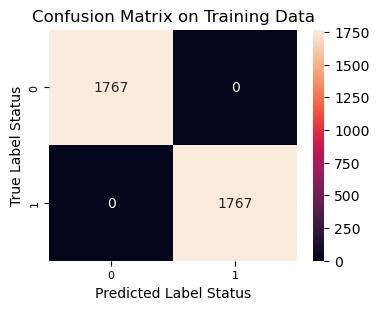

In [ ]:
# Evaluasi model pada data latih
evaluation_report(y_train, y_train_rf_model, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       442
           1       0.90      0.93      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



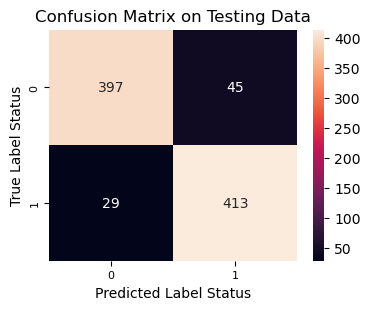

In [60]:
# Evaluasi model pada data uji
evaluation_report(y_test, y_test_rf_model, title='Testing Data')

#### 5.2 Hyperparameter Tuning

In [61]:
# Pengaturan hiperparameter pada model dasar menggunakan Grid Search Cross Validation
param_grid = {
    'n_estimators': [100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [False],
    'class_weight': ['balanced']
}

clf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500],
                         'oob_score': [False]},
             verbose=3)

In [62]:
# Penyesuaian parameter untuk model terbaik
best_rf_model = clf.fit(X_train, y_train)
best_rf_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features='log2', min_samples_split=3)

In [63]:
# Prediksi data latih dan uji menggunakan model terbaik
y_train_best = best_rf_model.predict(X_train)
y_test_best = best_rf_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



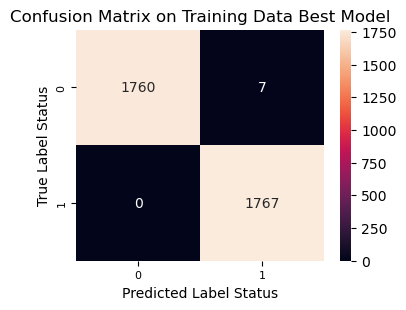

In [64]:
# Evaluasi hasil latih model setelah pengaturan hiperparameter
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       442
           1       0.90      0.94      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



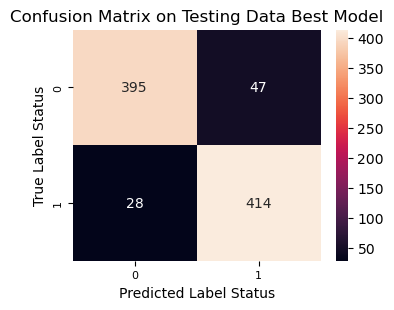

In [65]:
# Evaluasi hasil uji model setelah pengaturan hiperparameter
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

### 6. Export Model dan Requirement.txt

In [66]:
joblib.dump(best_rf_model, 'rf_model.joblib')

['rf_model.joblib']

In [71]:
pip list --format=freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
